<a href="https://colab.research.google.com/github/tjwei/NCTU_DeepLearning/blob/master/tf2_tutorial/01_Quick_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

作業簡介

先下載tensorflow2

下面有使用兩組數據一組是mnist 一組是cifar10

mnist數字辨認較簡單只要一層flatten 兩層Dense 可以高達90趴的辨識率
以下分別使用adam,sgq兩種網路優化法

In [0]:
!pip install tensorflow-gpu==2.0.0-rc1

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

In [0]:
#mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)

(60000, 28, 28) uint8
(60000,) uint8


In [0]:
print(y_train.shape)
print(y_test.shape)
print(y_train[:20])
print(y_test[:20])

(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
from PIL import Image
Image.fromarray(x_train[1])

In [0]:
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

#正規化

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),##固定輸入
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
#定義模型

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


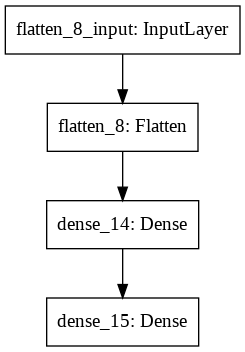

In [0]:
tf.keras.utils.plot_model(model)###

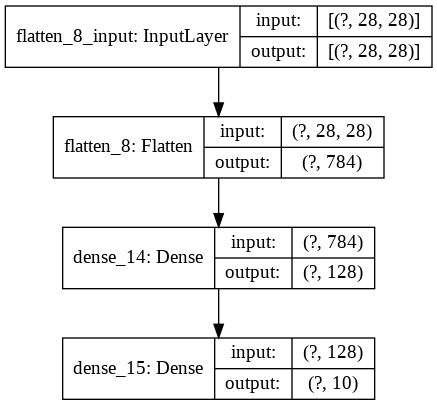

In [0]:
tf.keras.utils.plot_model(model,show_shapes = True  )###

In [0]:
#for mnist with sgd
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
##adam 好
##sgd 的精準度和learning rate有很大關係

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4620 - accuracy: 0.8664 - val_loss: 0.3061 - val_accuracy: 0.9111
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2826 - accuracy: 0.9188 - val_loss: 0.2446 - val_accuracy: 0.9306
Epoch 3/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2360 - accuracy: 0.9321 - val_loss: 0.2209 - val_accuracy: 0.9334
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2031 - accuracy: 0.9420 - val_loss: 0.1877 - val_accuracy: 0.9460
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1790 - accuracy: 0.9490 - val_loss: 0.1710 - val_accuracy: 0.9484
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1593 - accuracy: 0.9543 - val_loss: 0.1561 - val_accuracy: 0.9530
Epoch 7/10
60000/60000 [==========================

In [0]:
#for mnist with adam
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1765 - accuracy: 0.9461 - val_loss: 0.1546 - val_accuracy: 0.9529
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1310 - accuracy: 0.9602 - val_loss: 0.1389 - val_accuracy: 0.9604
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1112 - accuracy: 0.9664 - val_loss: 0.1310 - val_accuracy: 0.9605
Epoch 4/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0964 - accuracy: 0.9703 - val_loss: 0.1160 - val_accuracy: 0.9645
Epoch 5/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.1058 - val_accuracy: 0.9659
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0805 - accuracy: 0.9745 - val_loss: 0.1133 - val_accuracy: 0.9679
Epoch 7/10
60000/60000 [==========================

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10230976697013247, 0.9729]

In [0]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
#from tensorflow.keras.layers import Flatten,Dense
#from tensorflow.keras.layers import Sequential
#from tensorflow.keras.layers import Activation
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3102 - accuracy: 0.9067 - val_loss: 0.1676 - val_accuracy: 0.9492
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1598 - accuracy: 0.9519 - val_loss: 0.1282 - val_accuracy: 0.9589
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1256 - accuracy: 0.9625 - val_loss: 0.1331 - val_accuracy: 0.9621
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1061 - accuracy: 0.9676 - val_loss: 0.1181 - val_accuracy: 0.9641
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0929 - accuracy: 0.9714 - val_loss: 0.1027 - val_accuracy: 0.9708
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0834 - accuracy: 0.9734 - val_loss: 0.1001 - val_accuracy: 0.9694
Epoch 7/10
60000/60000 [==========================

In [0]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import ReLU,Softmax,LeakyReLU
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128),
    #Activation=('relu'),
    ReLU(),
    #LeakyReLU(斜率)##當值小於0不會直接等於0 以輸入斜率延伸
    Dense(10),
    #Activation=('softmax')
    Softmax()
])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3222 - accuracy: 0.9032 - val_loss: 0.1712 - val_accuracy: 0.9513
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1658 - accuracy: 0.9509 - val_loss: 0.1217 - val_accuracy: 0.9646
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1290 - accuracy: 0.9597 - val_loss: 0.1425 - val_accuracy: 0.9576
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1058 - accuracy: 0.9669 - val_loss: 0.1208 - val_accuracy: 0.9649
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.1088 - val_accuracy: 0.9674
Epoch 6/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.1231 - val_accuracy: 0.9642
Epoch 7/10
60000/60000 [==========================

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10490894388372544, 0.9703]

作業cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()##使用不同的data
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
y_train=y_train.reshape((1,-1)).reshape((50000,))
y_test=y_test.reshape((1,-1)).reshape((10000,))
#reshape和mnist格式一樣(不做也能過)

(50000, 32, 32, 3) uint8
(50000, 1) uint8


In [0]:
print(y_train.shape)
print(y_test.shape)
print(y_train[:20])
print(y_test[:20])

(50000,)
(10000,)
[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

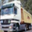

In [0]:
from PIL import Image
Image.fromarray(x_train[1])

In [0]:
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

#正規化

In [0]:
##For new dataset
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3, activation='relu',strides = 1,input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding ='same', data_format='channels_last'),
    tf.keras.layers.Flatten(input_shape=(32,32.3)),##固定輸入
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
#定義模型 
#cifar使用一層convolution  一層maxpooling 一層flatten 兩層Dense 

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               7372928   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 7,376,010
Trainable params: 7,376,010
Non-trainable params: 0
_________________________________________________________________


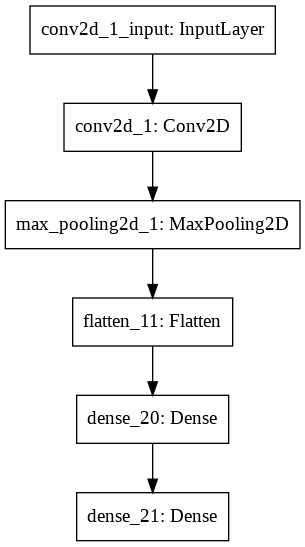

In [0]:
tf.keras.utils.plot_model(model)###

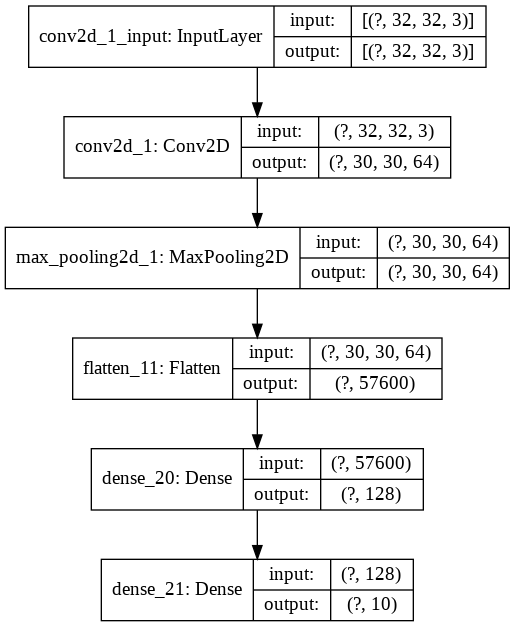

In [0]:
tf.keras.utils.plot_model(model,show_shapes = True  )###

In [0]:
#for cifar10 with adam
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size = 64,validation_data=(x_test, y_test))
##validation_data 驗證

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 239us/sample - loss: 1.3903 - accuracy: 0.5170 - val_loss: 1.1542 - val_accuracy: 0.5950
Epoch 2/10
50000/50000 [==============================] - 11s 224us/sample - loss: 1.0205 - accuracy: 0.6453 - val_loss: 1.0547 - val_accuracy: 0.6391
Epoch 3/10
50000/50000 [==============================] - 11s 224us/sample - loss: 0.8830 - accuracy: 0.6926 - val_loss: 1.0294 - val_accuracy: 0.6526
Epoch 4/10
50000/50000 [==============================] - 11s 228us/sample - loss: 0.7790 - accuracy: 0.7305 - val_loss: 1.0751 - val_accuracy: 0.6373
Epoch 5/10
50000/50000 [==============================] - 11s 227us/sample - loss: 0.6944 - accuracy: 0.7592 - val_loss: 1.0163 - val_accuracy: 0.6643
Epoch 6/10
50000/50000 [==============================] - 11s 225us/sample - loss: 0.6127 - accuracy: 0.7863 - val_loss: 1.0169 - val_accuracy: 0.6751
Epoch 7/10
50000/50000 [====================

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3227626147270202, 0.6567]

In [0]:
#for cifar10 with sgd
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8)
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 17s 339us/sample - loss: 0.3764 - accuracy: 0.8775 - val_loss: 1.8379 - val_accuracy: 0.6197
Epoch 2/10
50000/50000 [==============================] - 16s 330us/sample - loss: 0.2675 - accuracy: 0.9082 - val_loss: 2.0933 - val_accuracy: 0.6118
Epoch 3/10
50000/50000 [==============================] - 17s 330us/sample - loss: 0.2377 - accuracy: 0.9180 - val_loss: 1.9451 - val_accuracy: 0.6443
Epoch 4/10
50000/50000 [==============================] - 16s 329us/sample - loss: 0.2195 - accuracy: 0.9249 - val_loss: 1.9374 - val_accuracy: 0.6522
Epoch 5/10
50000/50000 [==============================] - 16s 327us/sample - loss: 0.2106 - accuracy: 0.9281 - val_loss: 1.9759 - val_accuracy: 0.6483
Epoch 6/10
50000/50000 [==============================] - 16s 326us/sample - loss: 0.1852 - accuracy: 0.9370 - val_loss: 2.0270 - val_accuracy: 0.6571
Epoch 7/10
50000/50000 [====================

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.224012819099426, 0.6506]

## Use MSE as  loss in mnist data

In [0]:
#mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

#正規化
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),##固定輸入
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])

(60000, 28, 28) uint8
(60000,) uint8


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0171 - accuracy: 0.8852 - val_loss: 0.0101 - val_accuracy: 0.9337
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0091 - accuracy: 0.9408 - val_loss: 0.0082 - val_accuracy: 0.9463
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0070 - accuracy: 0.9552 - val_loss: 0.0066 - val_accuracy: 0.9574
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0058 - accuracy: 0.9631 - val_loss: 0.0054 - val_accuracy: 0.9647
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0051 - accuracy: 0.9677 - val_loss: 0.0049 - val_accuracy: 0.9686
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0045 - accuracy: 0.9716 - val_loss: 0.0050 - val_accuracy: 0.9679
Epoch 7/10
60000/60000 [==========================

In [0]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.004402753316518738, 0.9733]